# Setup Notebook

## Clone Repository

In [1]:
!git clone https://github.com/tcl002/CSE151AProject.git

Cloning into 'CSE151AProject'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 135 (delta 17), reused 5 (delta 2), pack-reused 91
Receiving objects: 100% (135/135), 13.86 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (43/43), done.


## Install Requirements

In [2]:
pip install scikeras keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


## Import Libraries

In [3]:
# data visualization imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# model implementation imports
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import Data

In [4]:
df = pd.read_csv("CSE151AProject/dataset/data.csv", sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Preprocessing

In [5]:
df.describe() # watch count mean std min 25% 50% 75% max

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.dtypes
# total of data type

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [7]:
categorical = np.array(['Application mode', 'Application order', 'Course','Previous qualification','Nacionality',
                        'Marital status', 'Mother\'s qualification', 'Father\'s qualification','Mother\'s occupation','Father\'s occupation'])
numerical = np.array(['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
                      'Previous qualification (grade)','Admission grade','Age at enrollment','Unemployment rate','Inflation rate', 'GDP'])
binary = np.array(['Daytime/evening attendance\t','Displaced', 'Educational special needs', 'Debtor','Tuition fees up to date','Gender',
                   'Scholarship holder','International'])

## Encode Target

In [8]:
enc = OneHotEncoder()
enc_target_arr = enc.fit_transform(df.Target.values.reshape(-1,1)).toarray()
enc_target_df = pd.DataFrame(enc_target_arr, columns = list(enc.categories_[0]))
prepro_df = pd.concat([df.drop(columns=["Target"]), enc_target_df], axis = 1)
prepro_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0.0,0.0,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0.0,0.0,1.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,0.0,0.0,1.0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,1.0,0.0,0.0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,1.0,0.0,0.0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,0.0,0.0,1.0


## MinMax Normalization

In [9]:
scaler = MinMaxScaler()
prepro_df[numerical] = pd.DataFrame(scaler.fit_transform(prepro_df[numerical]), columns = numerical)
prepro_df[numerical].describe().round(2)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,0.04,0.24,0.18,0.18,0.56,0.01,0.03,0.27,0.24,0.22,0.55,0.01,0.40,0.34,0.12,0.46,0.45,0.54
std,0.12,0.10,0.09,0.12,0.26,0.06,0.10,0.10,0.12,0.15,0.28,0.06,0.14,0.15,0.14,0.31,0.31,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.19,0.13,0.12,0.58,0.00,0.00,0.22,0.18,0.10,0.58,0.00,0.32,0.24,0.04,0.21,0.24,0.31
50%,0.00,0.23,0.18,0.19,0.65,0.00,0.00,0.26,0.24,0.25,0.66,0.00,0.40,0.33,0.06,0.41,0.49,0.58
75%,0.00,0.27,0.22,0.23,0.71,0.00,0.00,0.30,0.30,0.30,0.72,0.00,0.47,0.42,0.15,0.73,0.76,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Data Visualization

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


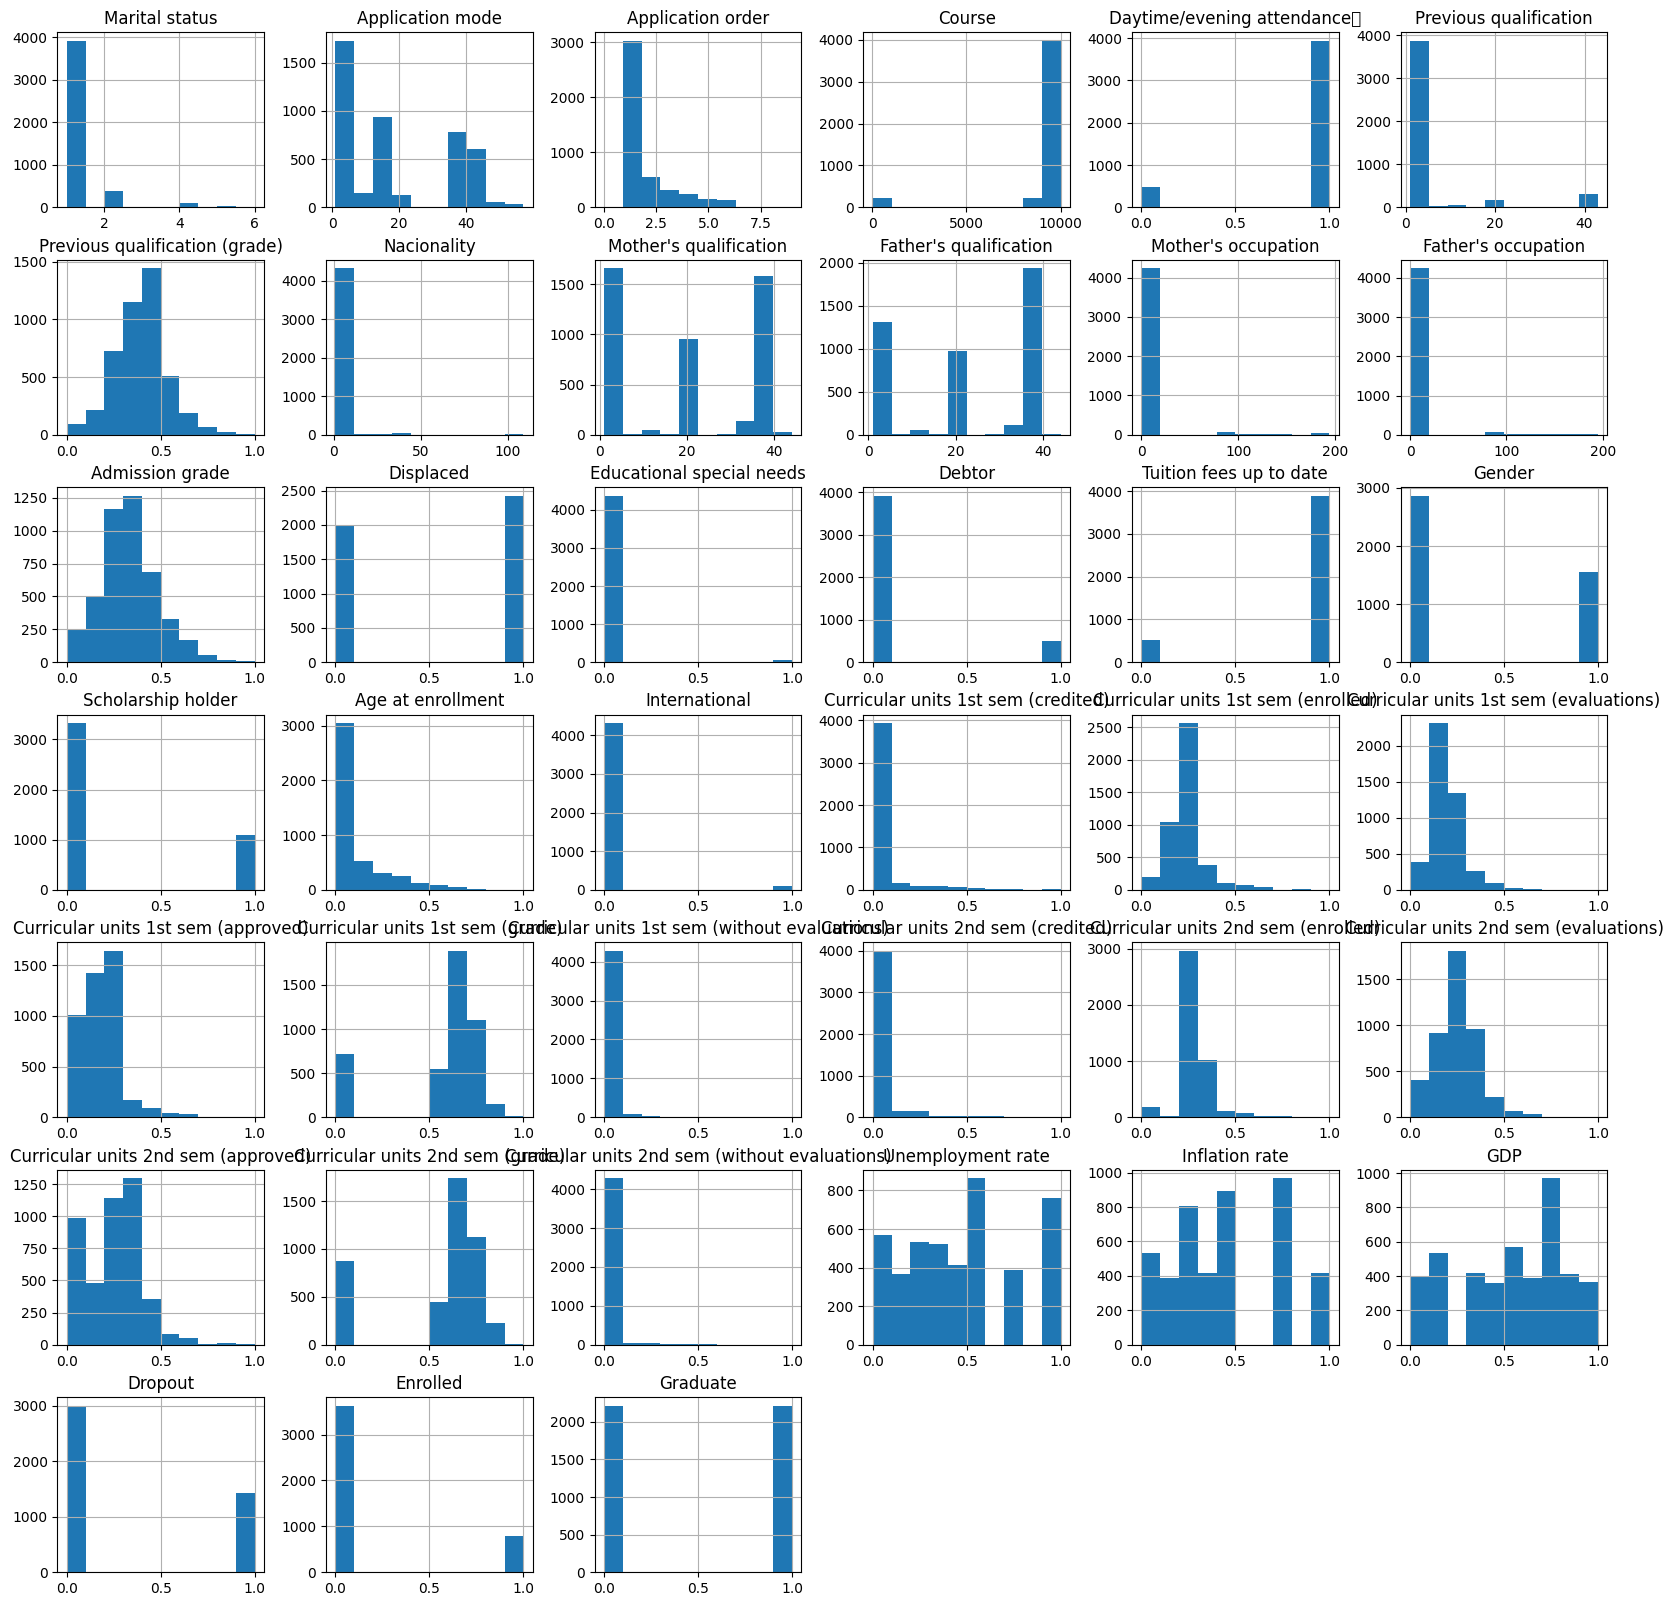

In [10]:
prepro_df.hist(figsize = (20, 20), grid = True)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


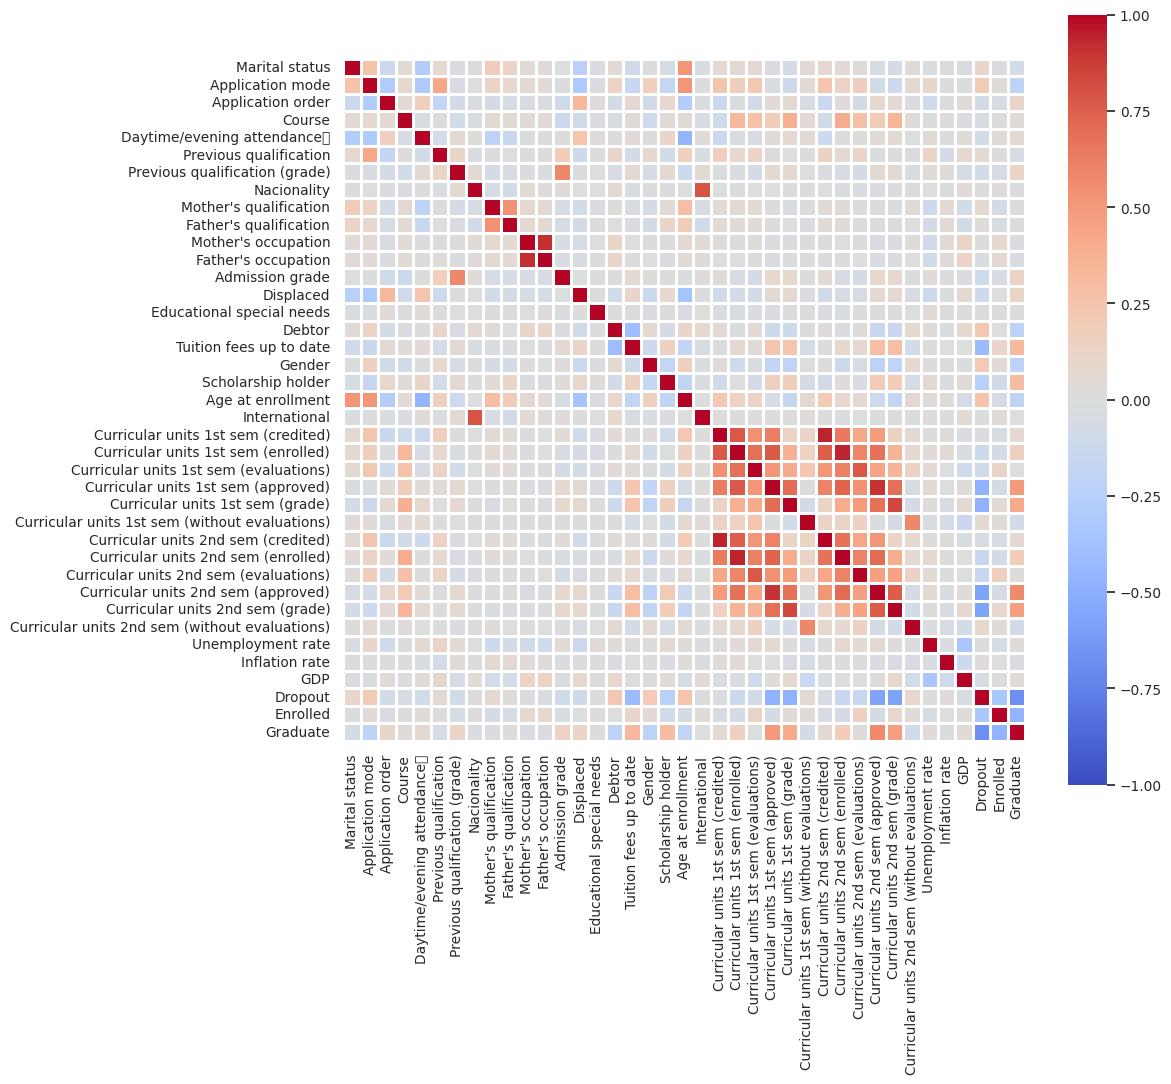

In [11]:
sns.set(rc = {'figure.figsize':(11,10)})
sns.set(font_scale=0.9)
corr = prepro_df.corr()
graph = sns.heatmap(corr, cmap= 'coolwarm', square = True,
                    vmin = -1, vmax = 1, center = 0,
                    linewidths = 1, linecolor='white')

There seems to be some correlation for (Scholarship holder, Age at enrollment, Curricucular units 1st sem(approved), Curricucular units 1st sem(graded), Curricucular units 2nd sem(approved), Curricucular units 2nd sem(graded), Application mode, Debtor, Tuition fees up to date, gender) to Target.

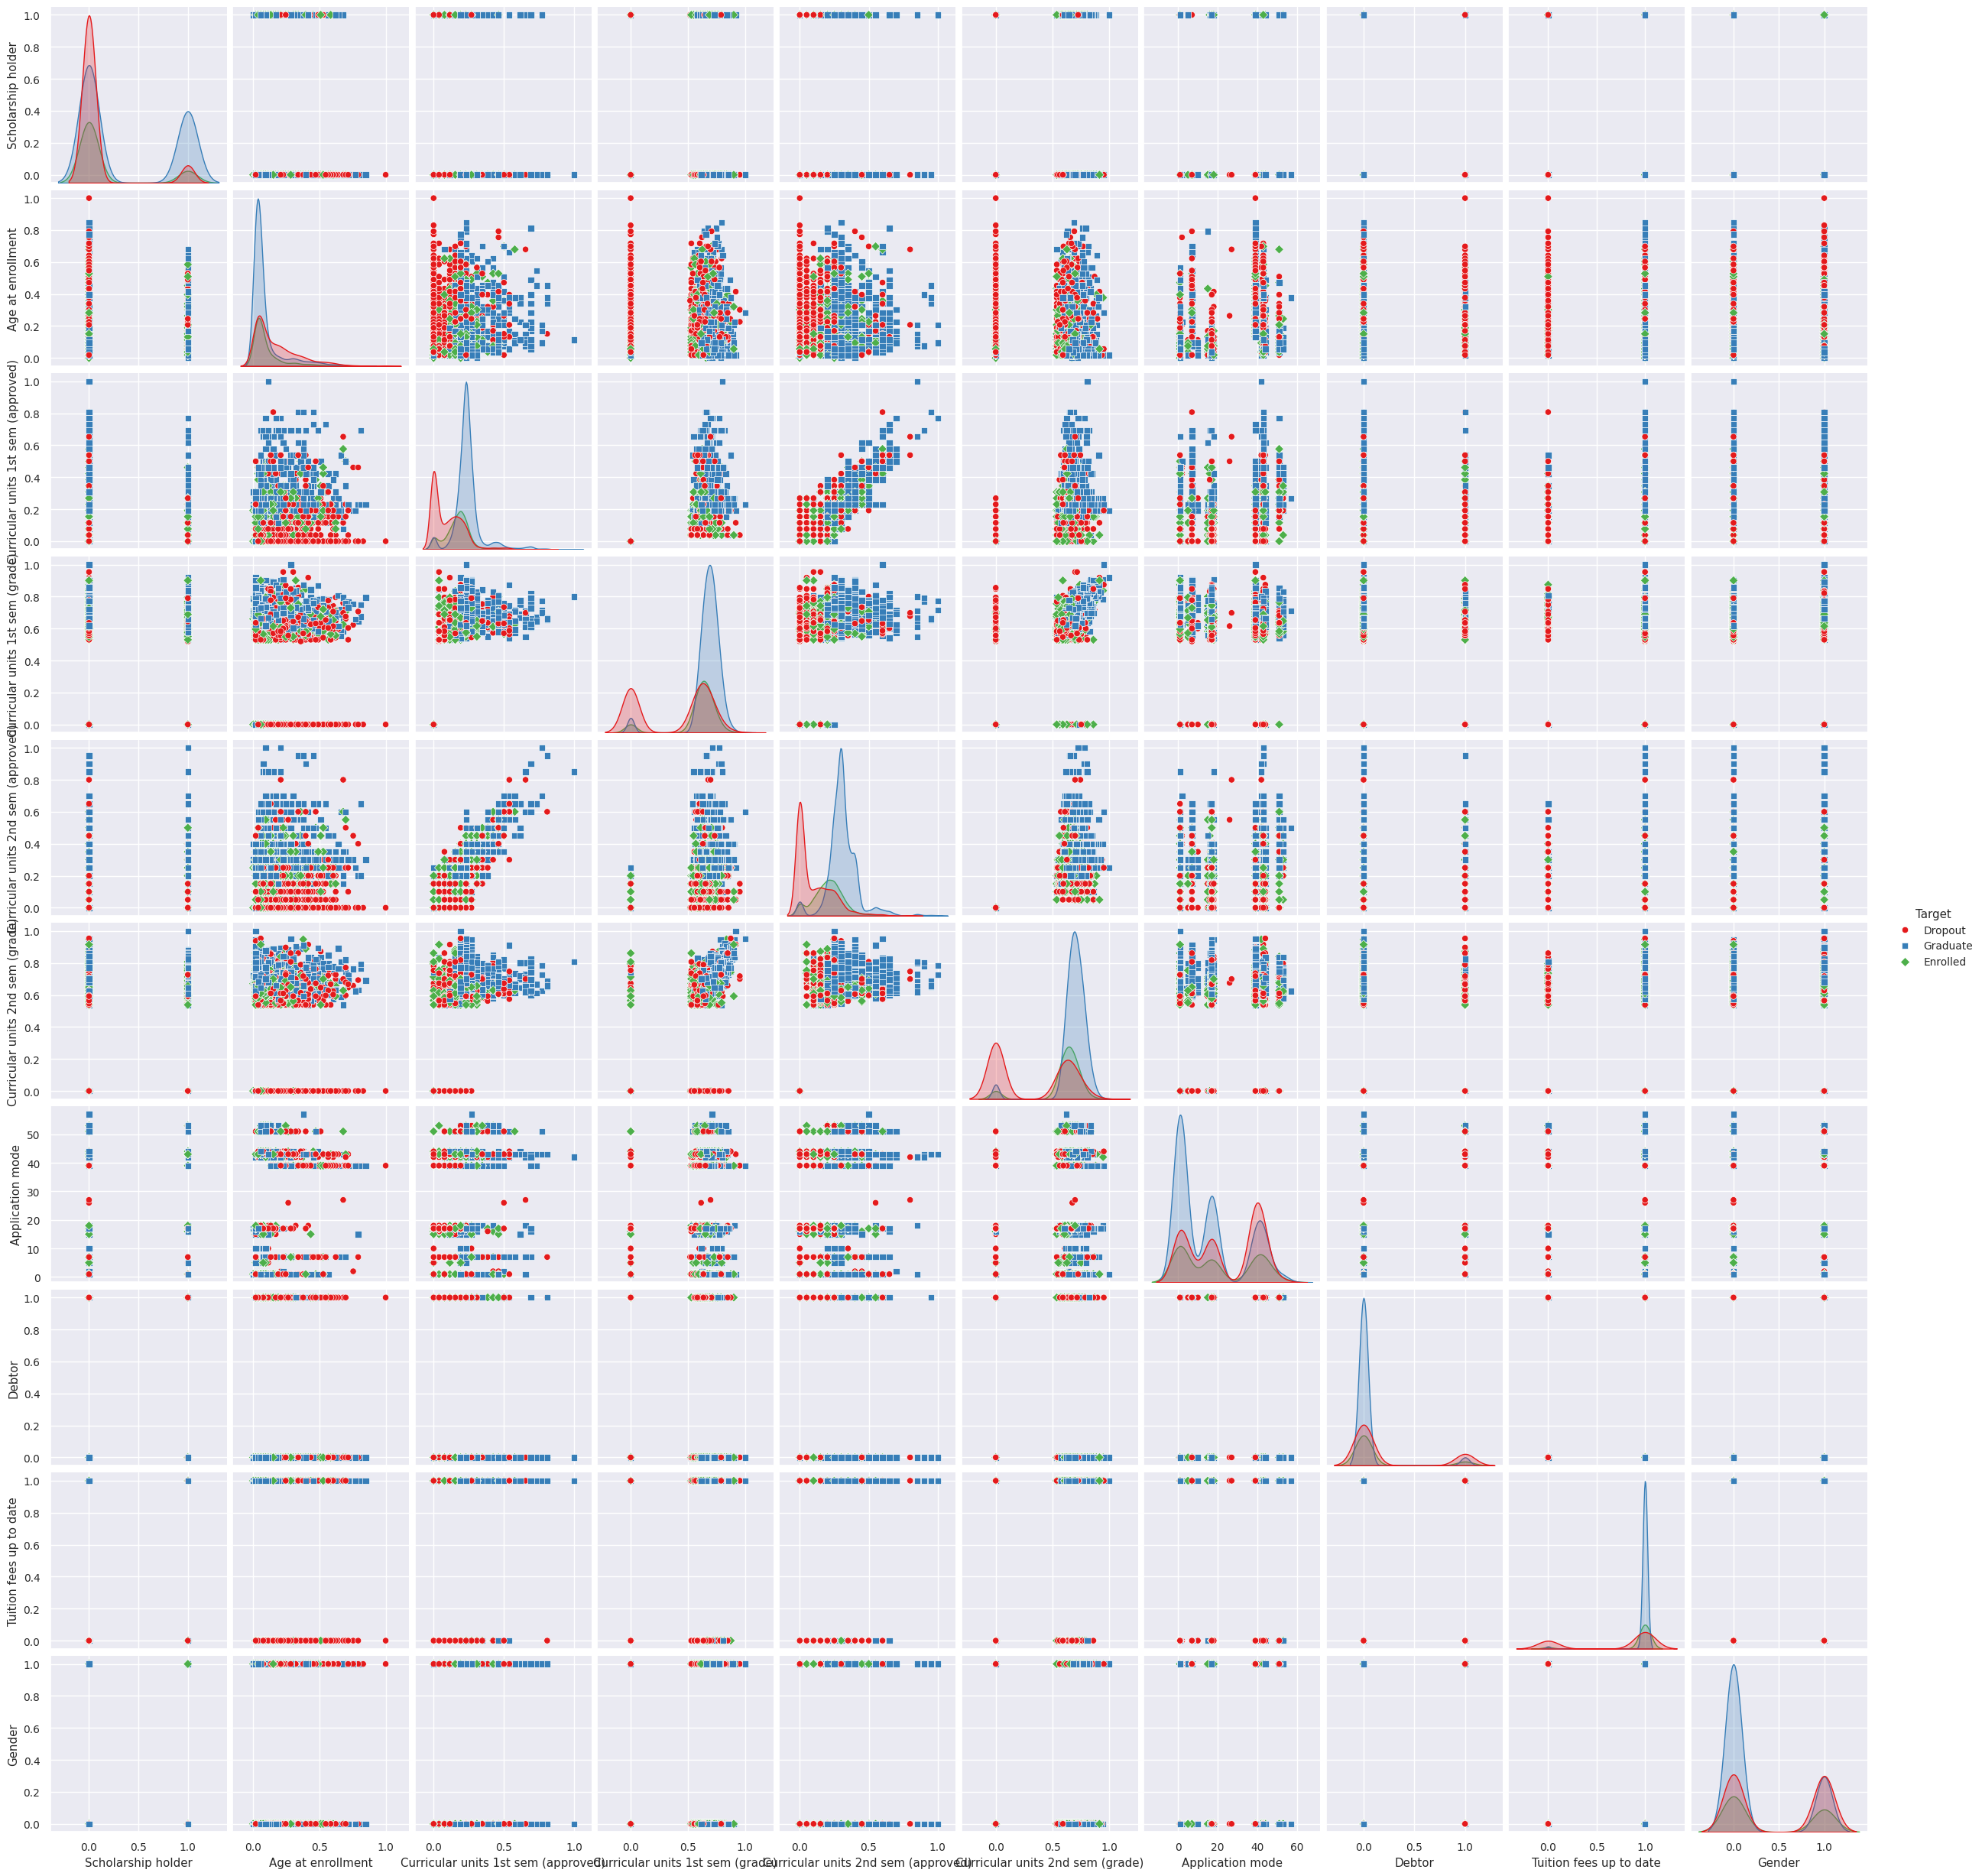

In [12]:
# List of features to include in the pairplot
selected_features = [
    'Scholarship holder',
    'Age at enrollment',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Application mode',
    'Debtor',
    'Tuition fees up to date',
    'Gender'
]

# Create a DataFrame with the selected features + target
selected_data = pd.concat([prepro_df[selected_features], df['Target']], axis=1)
# Plot pairplot
sns.pairplot(selected_data, hue='Target', markers=["o", "s", "D"], palette="Set1")
plt.show()

In [13]:
df_vis = pd.concat([prepro_df.drop(columns = ["Dropout", "Enrolled", "Graduate"]), df.Target], axis = 1)

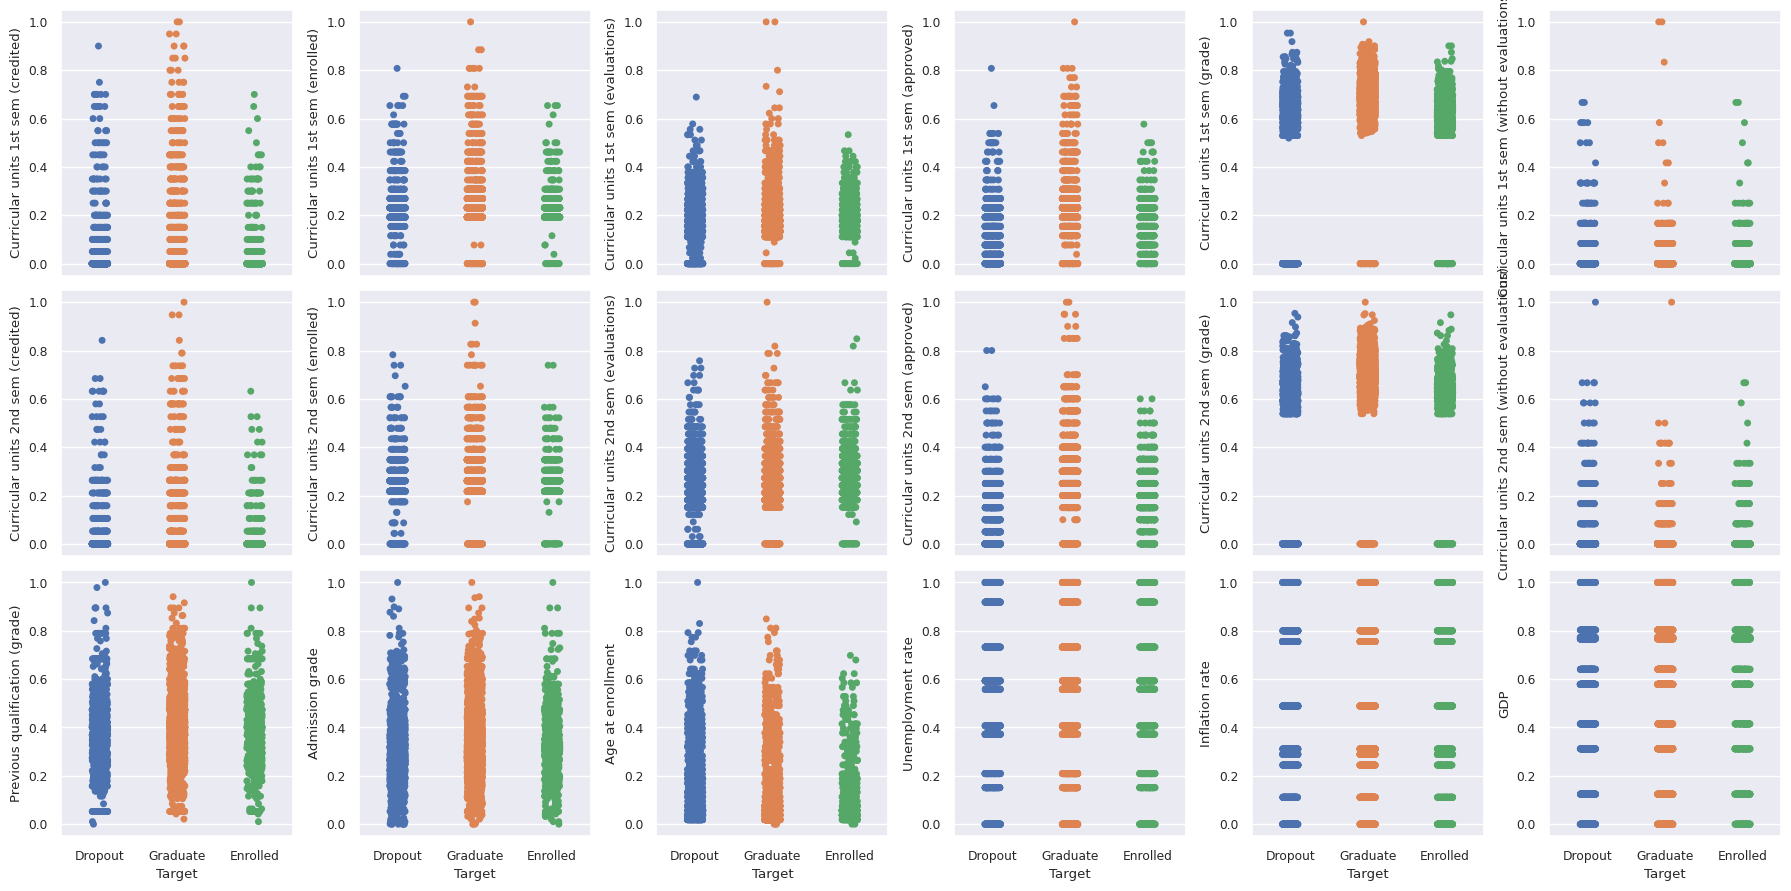

In [14]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(3,6, sharex = True, figsize = (18,9))
for x in range(3):
    for y in range(6):
        sns.stripplot(ax = axes[x,y], data = df_vis, x = "Target", hue = "Target", y = numerical[6*x+y])
figure.tight_layout()
plt.show()

In [15]:
for var in binary:
    df_vis[var] = df_vis.apply(lambda row: "yes" if row[var] == 1 else "no", axis=1)

df_vis['Gender'] = df_vis.apply(lambda row: "female" if row['Gender'] == "no" else "male", axis=1)
df_vis['Daytime/evening attendance\t'] = df_vis.apply(lambda row: "daytime" if row['Daytime/evening attendance\t'] == "yes" else "evening", axis=1)

<ipython-input-16-80249fd41a9b>:6: UserWarning: Glyph 9 (	) missing from current font.
  figure.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


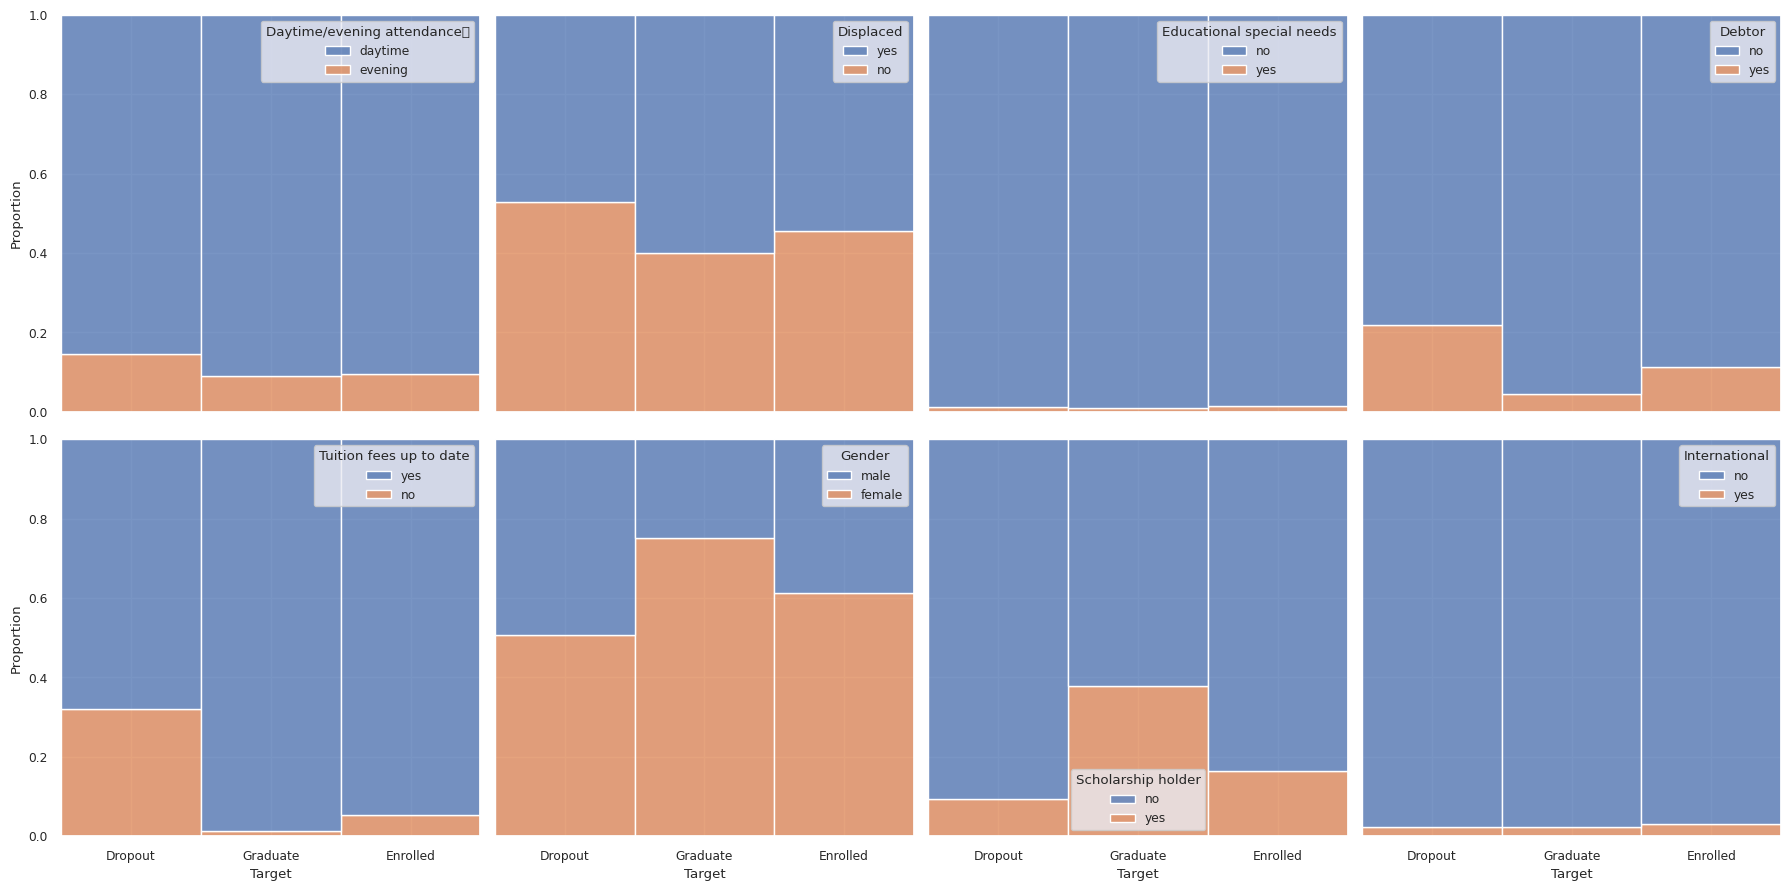

In [16]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,4, sharex = True, sharey = True, figsize = (18,9))
for x in range(2):
    for y in range(4):
        sns.histplot(ax = axes[x,y], data = df_vis, x = "Target", hue = binary[4*x+y], multiple="fill", stat="proportion")
figure.tight_layout()
plt.show()

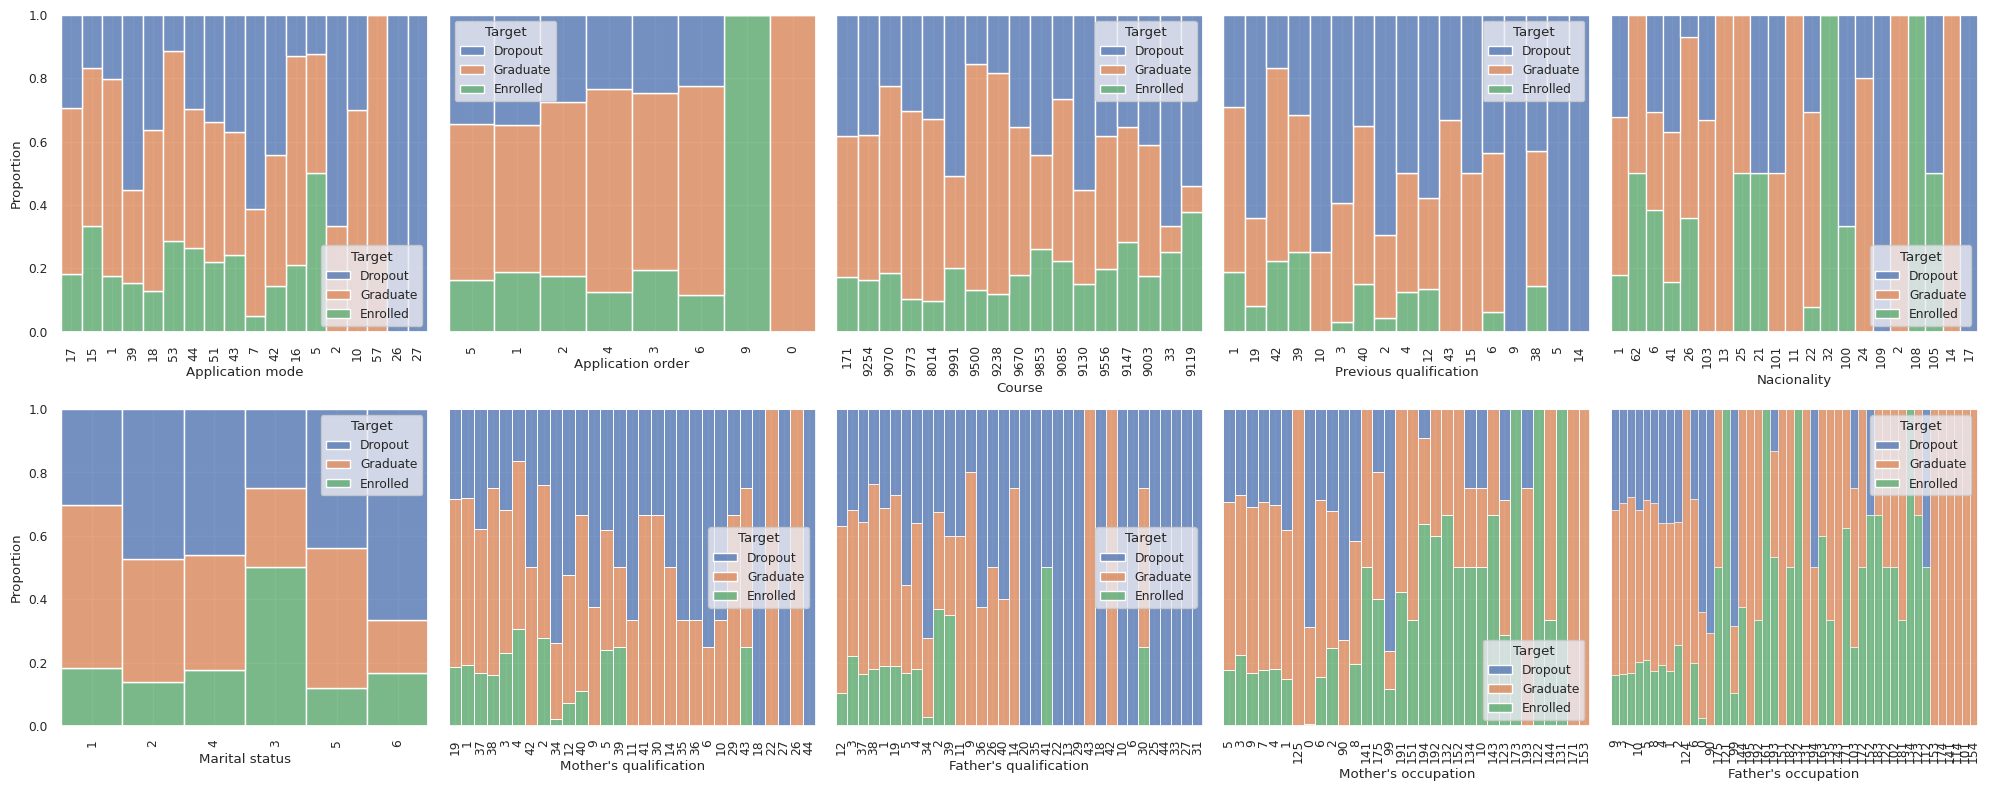

In [17]:
for var in categorical:
    df_vis[var] = df_vis[var].apply(str)

sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,5, figsize = (20,8), sharey = True, )
for x in range(2):
    for y in range(5):
        sns.histplot(ax = axes[x,y], data = df_vis, x = categorical[5*x+y], hue = "Target", multiple="fill", stat="proportion")
        axes[x,y].tick_params(axis='x', labelrotation=90)
figure.tight_layout()
plt.show()

# Data Exploration

## Missing Data:
- **Count of Missing Values:** There are no missing values in any column of the dataset, eliminating the immediate need for imputation strategies. This is crucial for ensuring the integrity of analyses and model training.

In [18]:
#find missing data
missing_values = df.isnull()
missing_count = df.isnull().sum()

In [19]:
print("DataFrame with missing values:")
df.head()

DataFrame with missing values:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [20]:
print("\nMissing values (True indicates missing):")
missing_values.head()


Missing values (True indicates missing):


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
print("\nCount of missing values in each column:")
print(missing_count)


Count of missing values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder     

There is no missing data within the dataset.

## Correlation Analysis Summary

The correlation matrix provides insights into the linear relationships between numeric variables. Here are key observations and implications for analysis and modeling:

### Key Observations:
- **Marital Status** has a moderate positive correlation with **Age at Enrollment** (0.52) and **Application Mode** (0.26), suggesting that marital status might influence application behavior and age at enrollment.
- **Application Mode** shows a strong positive correlation with **Previous Qualification** (0.42), indicating that the mode of application could be linked to the applicant's educational background.
- **Curricular Units (credited, enrolled, evaluations, approved, grade, without evaluations)** for both semesters have significant correlations among themselves, which is expected as they are directly related to students' academic performance and engagement.
- The **Unemployment Rate** has a negative correlation with **GDP** (-0.335), suggesting an inverse relationship between the country's economic performance and unemployment levels.

### Implications for Analysis:
- **Feature Selection:** Variables with high correlation may convey redundant information for modeling. Consider using feature selection techniques to reduce multicollinearity.
- **Insight Generation:** Correlations can guide the exploration of interesting relationships for deeper analysis. For example, investigating how application mode influences academic performance or the impact of economic factors on student outcomes.
- **Predictive Modeling:** Understanding correlations is crucial for building predictive models. It helps in choosing which features to include and potentially in feature engineering to improve model performance.

In [22]:
X = df.drop("Target", axis=1)
y = df["Target"]#set y be the target

In [23]:
#find how many grad ,drop and enroll
y.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [24]:
corr = X.corr()
corr.round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.00,0.26,-0.13,0.05,-0.27,0.06,-0.02,-0.01,0.19,0.13,...,0.03,0.06,0.04,0.02,-0.04,-0.07,0.02,-0.02,0.01,-0.03
Application mode,0.26,1.00,-0.29,0.07,-0.30,0.42,-0.04,-0.00,0.12,0.08,...,0.05,0.24,0.13,0.17,-0.07,-0.12,0.05,0.09,-0.02,-0.02
Application order,-0.13,-0.29,1.00,0.06,0.16,-0.18,-0.06,-0.02,-0.06,-0.05,...,-0.03,-0.13,0.03,-0.06,0.07,0.06,-0.02,-0.10,-0.01,0.03
Course,0.05,0.07,0.06,1.00,-0.04,0.01,-0.08,-0.03,0.05,0.05,...,0.03,-0.09,0.40,0.28,0.20,0.35,0.03,0.01,0.02,-0.02
Daytime/evening attendance\t,-0.27,-0.30,0.16,-0.04,1.00,-0.07,0.05,0.02,-0.20,-0.14,...,0.05,-0.11,0.00,0.01,0.03,0.05,-0.00,0.06,-0.02,0.02
Previous qualification,0.06,0.42,-0.18,0.01,-0.07,1.00,0.10,-0.03,-0.01,-0.01,...,0.00,0.14,0.06,0.11,-0.01,0.00,0.01,0.11,-0.06,0.06
Previous qualification (grade),-0.02,-0.04,-0.06,-0.08,0.05,0.10,1.00,0.05,-0.06,-0.04,...,-0.00,-0.02,-0.03,-0.06,0.05,0.05,-0.02,0.05,0.02,-0.05
Nacionality,-0.01,-0.00,-0.02,-0.03,0.02,-0.03,0.05,1.00,-0.05,-0.09,...,0.01,-0.01,-0.02,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,0.03
Mother's qualification,0.19,0.12,-0.06,0.05,-0.20,-0.01,-0.06,-0.05,1.00,0.54,...,0.00,0.04,0.04,0.02,-0.01,-0.03,0.02,-0.11,0.06,-0.08
Father's qualification,0.13,0.08,-0.05,0.05,-0.14,-0.01,-0.04,-0.09,0.54,1.00,...,-0.02,0.04,0.02,0.01,0.01,-0.01,-0.01,-0.08,0.06,-0.07


# Milestone 3: Logistic Regression

## Data Processing

In [25]:
# Step 1: Encode the Target Variable
enc = OneHotEncoder()
enc_target_arr = enc.fit_transform(df.Target.values.reshape(-1,1)).toarray()
enc_target_df = pd.DataFrame(enc_target_arr, columns = list(enc.categories_[0]))

# Step 1.5: Encode other Categorical Features
for var in categorical:
  enc = OneHotEncoder()
  enc_arr = enc.fit_transform(df[var].values.reshape(-1,1)).toarray()
  df = pd.concat([df, pd.DataFrame(enc_arr)], axis = 1)
df.columns = df.columns.astype(str)

# Step 2: Scale Numerical Features
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 3: Combine Preprocessed Data
prepro_df = pd.concat([df.drop(columns=['Target']), enc_target_df], axis=1)

# # Step 4: Split the Dataset
X = df.drop(columns=['Target'])
y = enc_target_df['Dropout']
#X = prepro_df.drop(columns=enc.get_feature_names_out(['Target']))
# y = enc_target_df

# # Step 5: Prepare the Y data
# y_logistic = df['Target']
# y_combined = pd.concat([y_logistic, y], axis=1)

#split the data
#y_combined['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1}, inplace=True)

For our logistic regression model, we have decided to do a binary prediction for our target class. Since our target is originally multiclass (Dropout, Enrolled, Graduate), we have combined enrolled and graduate into the same category. Our logistic regression model will then predict whether or not the student has dropped out at the end of the semester (label 0), or is enrolled or has graduated at the end of the semester (label 1).

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [27]:
#create a validation set from our training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 0, test_size =0.1)

In [28]:
#These are the features that we will use for our Logistic Regression model
#selected_features
feature_sets = [numerical, categorical, binary, X.columns[36:]]
train_accuracy = np.zeros(len(feature_sets))
val_accuracy = np.zeros(len(feature_sets))
train_loss = np.zeros(len(feature_sets))
val_loss = np.zeros(len(feature_sets))

for i,features in enumerate(feature_sets):
  #create a logistic model to predict whether or not they dropped out at the end of the semester or are enrolled/graduated
  model = LogisticRegression()
  model.fit(X_train[features], y_train)

  #predict the values in the training set
  predictions_train = model.predict(X_train[features])
  train_accuracy[i] = accuracy_score(y_train, predictions_train)
  train_loss[i] = log_loss(y_train, predictions_train)

  #see our model performance and calculate the accuracy and precision for our validation set
  predictions_val = model.predict(X_val[features])
  val_accuracy[i] = accuracy_score(y_val, predictions_val)
  val_loss[i] = log_loss(y_val, predictions_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


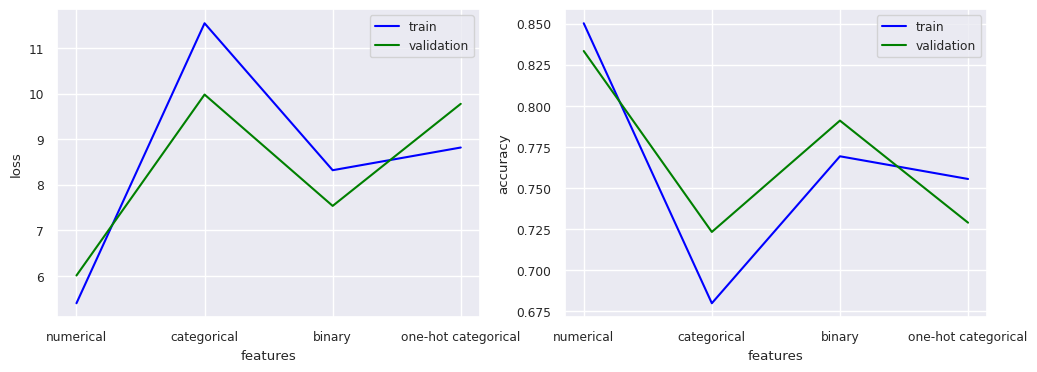

In [29]:
plt.figure(figsize=(12,4))
labels = ['numerical', 'categorical', 'binary', 'one-hot categorical']

plt.subplot(1,2,1)
plt.plot(labels, train_loss, color = 'blue')
plt.plot(labels, val_loss, color = 'green')
plt.xlabel("features")
plt.ylabel("loss")
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt.plot(labels, train_accuracy, color = 'blue')
plt.plot(labels, val_accuracy, color = 'green')
plt.xlabel("features")
plt.ylabel("accuracy")
plt.legend(['train','validation'])

In [30]:
best_features = np.concatenate([numerical, binary, X.columns[36:]], axis = 0)
train_accuracy = np.zeros(len(best_features))
val_accuracy = np.zeros(len(best_features))
train_loss = np.zeros(len(best_features))
val_loss = np.zeros(len(best_features))

for i in range(len(best_features)):
  features = best_features[0:i+1]

  #create a logistic model to predict whether or not they dropped out at the end of the semester or are enrolled/graduated
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train[features], y_train)

  #predict the values in the training set
  predictions_train = model.predict(X_train[features])
  train_accuracy[i] = accuracy_score(y_train, predictions_train)
  train_loss[i] = log_loss(y_train, predictions_train)

  #see our model performance and calculate the accuracy and precision for our validation set
  predictions_val = model.predict(X_val[features])
  val_accuracy[i] = accuracy_score(y_val, predictions_val)
  val_loss[i] = log_loss(y_val, predictions_val)

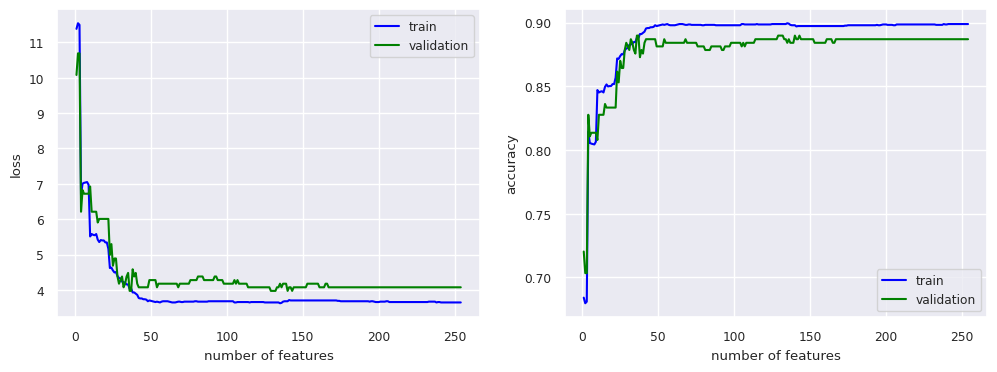

In [31]:
plt.figure(figsize=(12,4))
labels = range(1,len(best_features) + 1)

plt.subplot(1,2,1)
plt.plot(labels, train_loss, color = 'blue')
plt.plot(labels, val_loss, color = 'green')
plt.xlabel("number of features")
plt.ylabel("loss")
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt.plot(labels, train_accuracy, color = 'blue')
plt.plot(labels, val_accuracy, color = 'green')
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.legend(['train','validation'])

#### How the model fits into the fitting graph

Accuracy Graph:

- This graph suggests that as the model complexity or the number of features increases, the accuracy improves. However, the rate of improvement diminishes as more features are added.   
- The fact that the accuracy graph is close to how a log(x) looks like indicates that the model is learning effectively from the features and is making better predictions as it becomes more complex.

Loss Graph:

- This graph suggests that as the model complexity or the number of features increases, the loss decreases. Again, the rate of decrease slows down as more features are added.   
- The fact that the loss graph is close to how a -log(x) looks like indicates that the model is converging well during training, and the loss is decreasing as expected.

Closeness of the Lines:

- The fact that both accuracy and loss curves are close to each other suggests that the model is not overfitting (where training accuracy is much higher than validation accuracy) and is not underfitting (where both accuracies are low).   
- When both curves are close and decreasing in our loss graph, it indicates that the model is generalizing well to unseen data (validation set) and is not memorizing the training data (overfitting).

In [32]:
#BEST MODEL
num_features = np.argmin(val_loss)
features = best_features[0:num_features+1]

#create a logistic model to predict whether or not they dropped out at the end of the semester or are enrolled/graduated
model = LogisticRegression(max_iter = 1000)
model.fit(X_train[features], y_train)

#predict the values in the training set
predictions_train = model.predict(X_train[features])

In [33]:
#see our model performance and calculate the accuracy and precision for our training set
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2179
         1.0       0.90      0.73      0.80      1006

    accuracy                           0.89      3185
   macro avg       0.89      0.85      0.86      3185
weighted avg       0.89      0.89      0.88      3185



In [34]:
#see our model performance and calculate the accuracy and precision for our validation set
predictions_val = model.predict(X_val[features])

print(classification_report(y_val, predictions_val))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       255
         1.0       0.82      0.78      0.80        99

    accuracy                           0.89       354
   macro avg       0.87      0.86      0.86       354
weighted avg       0.89      0.89      0.89       354



In [35]:
#see our model performance and calculate the accuracy and precision for our testing set
predictions_test = model.predict(X_test[features])

print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       569
         1.0       0.87      0.72      0.79       316

    accuracy                           0.86       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885



### Label, Data, and Loss Changes (#1 in Milestone 4)

In [36]:
val_accuracy = accuracy_score(y_val, predictions_val)
val_loss = log_loss(y_val, predictions_val)
print("Val Accuracy Score", val_accuracy)
print("Val Loss Score", val_loss)

test_accuracy = accuracy_score(y_test, predictions_test)
test_loss = log_loss(y_test, predictions_test)
print("Test Accuracy Score", test_accuracy)
print("Test Loss Score", test_loss)

Val Accuracy Score 0.8898305084745762
Val Loss Score 3.9709109665976525
Test Accuracy Score 0.8621468926553673
Test Loss Score 4.968729619742703


While building the Liner Regression Model, notable changes were made to the features used and reducing the target labels to just dropout vs. graduate. The loss function remains unchanged due to the decent model performance shown during testing.

* Label Changes:

The change to only two output classes (dropout vs. graduate) was done before the logistic regression model was completed. This was done to better fit the definition of logistic regression we planned on using. Otherwise, a multi-classed logistic regression model had to be made instead. Therefore, only using two classes is required for our model.


* Data Changes:

In terms of the data, the number of features chosen for fitting the model was constantly changed to find the best accuracy/loss. The final features used by the best model contains the best features based on this selection. The final feature adjustment allowed the model to produce good accuracy (above 80%) and decent loss scores. Therefore, no further data changes need to be made.

* Loss Function Changes:

Because the number of features was adjusted to find the best-fit model, the loss function, accuracy, and other metrics from the classification report show the model's decent performance. More specifically, the test log loss score of 4.97 resembles the low training and validation log scores (as seen in their graphs in Milestone 3). This suggests little signs of overfitting or underfitting during training, and no change in loss function is needed.


# Milestone 4: Neural Net

(Label, Data, and Loss Changes for Milestone 4 @ end of Milestone 3)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras_tuner

In [38]:
# split train, test, and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.1)

In [39]:
def buildHPmodel(hp):
  model= Sequential([
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["sigmoid", "relu", "tanh", "softmax"]),
              input_dim = X_train[features].shape[1]
      ),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["sigmoid", "relu", "tanh", "softmax"]),
      ),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["sigmoid", "relu", "tanh", "softmax"]),
      ),
      Dense(
              units=hp.Int("units", min_value=32, max_value=512, step=32),
              activation=hp.Choice("activation", ["sigmoid", "relu", "tanh", "softmax"]),
      ),
      Dense(1, activation = 'sigmoid')
])
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  optimizer = hp.Choice("optimizer", ["SGD", "RMSprop"])
  if optimizer == "SGD":
    optimizer = SGD(learning_rate=learning_rate)
  elif optimizer == "RMSprop":
    optimizer = RMSprop(learning_rate=learning_rate)
  model.compile(optimizer=SGD(learning_rate=learning_rate), loss=hp.Choice("loss", ["mse", "binary_crossentropy"]), metrics=['accuracy'])
  return model

hp = keras_tuner.HyperParameters()
hp.Int("units", min_value=32, max_value=512, step=32)

tuner = keras_tuner.RandomSearch(
    hypermodel=buildHPmodel,
    objective="val_accuracy",
    max_trials=10,
    seed=15,
    executions_per_trial=5,
    #hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    #max_retries_per_trial=0,
    max_consecutive_failed_trials=3
)

In [40]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu', 'tanh', 'softmax'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'SGD', 'conditions': [], 'values': ['SGD', 'RMSprop'], 'ordered': False}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'binary_crossentropy'], 'ordered': False}


In [41]:
tuner.search(X_train[features], y_train, epochs=10, validation_data=(X_val[features], y_val))

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.7259887218475342

Best val_accuracy So Far: 0.8333333253860473
Total elapsed time: 00h 08m 14s


In [42]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
units: 224
activation: tanh
lr: 0.0019815016575264635
optimizer: SGD
loss: binary_crossentropy
Score: 0.8333333253860473

Trial 09 summary
Hyperparameters:
units: 160
activation: relu
lr: 0.007177664122743156
optimizer: SGD
loss: mse
Score: 0.7259887218475342

Trial 05 summary
Hyperparameters:
units: 256
activation: relu
lr: 0.0019004375238737127
optimizer: SGD
loss: mse
Score: 0.7209039688110351

Trial 00 summary
Hyperparameters:
units: 512
activation: relu
lr: 0.00110654178783952
optimizer: SGD
loss: binary_crossentropy
Score: 0.7203390002250671

Trial 01 summary
Hyperparameters:
units: 480
activation: sigmoid
lr: 0.008249331566936491
optimizer: RMSprop
loss: binary_crossentropy
Score: 0.7203390002250671

Trial 03 summary
Hyperparameters:
units: 288
activation: sigmoid
lr: 0.0001428379365495633
optimizer: RMSprop
loss: binary_crossent

In [43]:
models = tuner.get_best_models(num_models=1)
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               27104     
                                                                 
 dense_1 (Dense)             (None, 224)               50400     
                                                                 
 dense_2 (Dense)             (None, 224)               50400     
                                                                 
 dense_3 (Dense)             (None, 224)               50400     
                                                                 
 dense_4 (Dense)             (None, 1)                 225       
                                                                 
Total params: 178529 (697.38 KB)
Trainable params: 178529 (697.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model = Sequential()

MYACTIVATIONFXN = 'tanh'

model.add(Dense(units=224, activation=MYACTIVATIONFXN, input_dim=X_train[features].shape[1]))
model.add(Dense(units=224, activation=MYACTIVATIONFXN))
model.add(Dense(units=224, activation=MYACTIVATIONFXN))
model.add(Dense(units=224, activation=MYACTIVATIONFXN))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.0019815016575264635), loss='binary_crossentropy')

In [45]:
history = model.fit(X_train[features], y_train, validation_data=(X_val[features], y_val), batch_size=1, epochs=100, verbose=0)

In [46]:
predictions_train = model.predict(X_train[features])
predictions_train = np.where(predictions_train > 0.5, 1, 0)
print(classification_report(y_train, predictions_train))

100/100 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2179
         1.0       0.93      0.93      0.93      1006

    accuracy                           0.95      3185
   macro avg       0.95      0.95      0.95      3185
weighted avg       0.95      0.95      0.95      3185



In [47]:
predictions_val = model.predict(X_val[features])
predictions_val = np.where(predictions_val > 0.5, 1, 0)
print(classification_report(y_val, predictions_val))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       255
         1.0       0.66      0.77      0.71        99

    accuracy                           0.82       354
   macro avg       0.78      0.81      0.79       354
weighted avg       0.83      0.82      0.83       354



In [48]:
predictions_test = model.predict(X_test[features])
predictions_test = np.where(predictions_test > 0.5, 1, 0)
print(classification_report(y_test, predictions_test))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       569
         1.0       0.78      0.71      0.74       316

    accuracy                           0.82       885
   macro avg       0.81      0.80      0.80       885
weighted avg       0.82      0.82      0.82       885



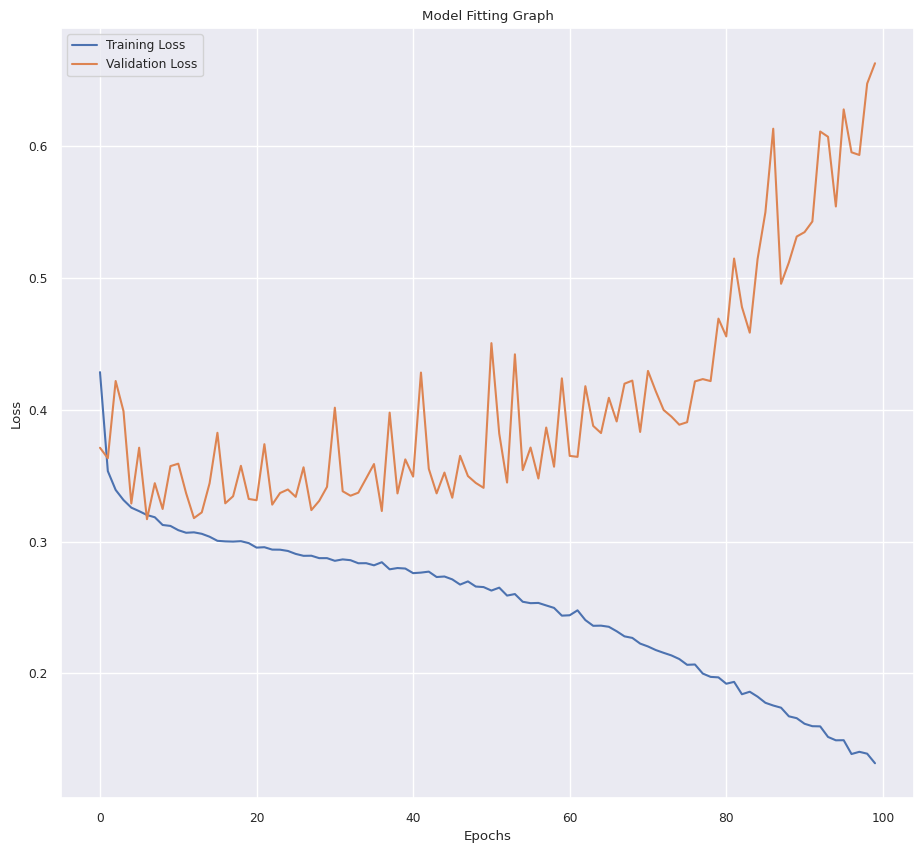

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Fitting Graph')
plt.legend()
plt.show()


* Training Loss Decreasing:   
  This means that the model is improving its performance on the training data over epochs, which is expected. Initially, the training loss is decreasing rapidly, which indicates that the model is learning quickly. However, as training progresses, the rate of improvement slowed down, which is still expected.

* Validation Loss Increasing:   
  The fact that the validation loss is increasing suggests that the model's performance on unseen data (validation set) is deteriorating as training progresses. This means that the model started to memorize the training data rather than learn general patterns. As a result, it became less effective at making predictions on new data.

The combination of decreasing training loss and increasing validation loss indicates that the model is overfitting.

10/10 [==============================] - 0s 2ms/step
Average Accuracy: 0.8718952702036631
Average Precision: 0.859194080889678
Average Recall: 0.7142364941330979
Average F1 Score: 0.7781128153748137


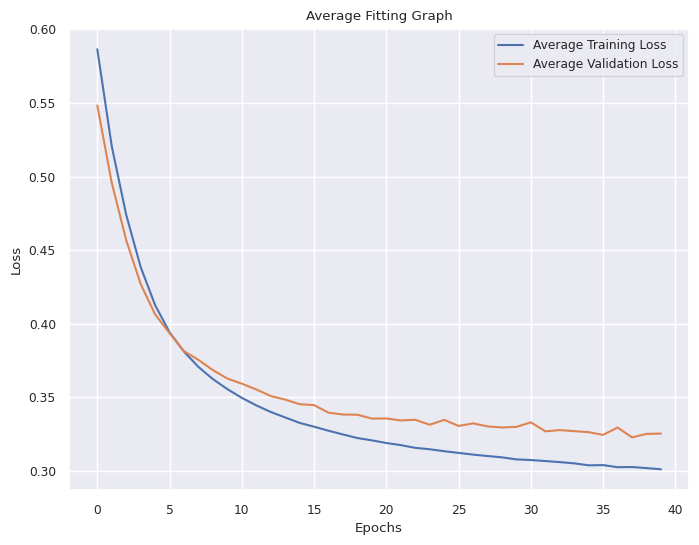

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# Lists to store the performance metrics for each fold
best_model = None
best_accuracy = 0
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
all_train_loss = []
all_val_loss = []

# Performing cross-validation
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index][features], X_train.iloc[val_index][features]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # creating new instance of model for each fold
    model = Sequential()
    model.add(Dense(units=224, activation=MYACTIVATIONFXN, input_dim=X_train_fold.shape[1]))
    model.add(Dense(units=224, activation=MYACTIVATIONFXN))
    model.add(Dense(units=224, activation=MYACTIVATIONFXN))
    model.add(Dense(units=224, activation=MYACTIVATIONFXN))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=SGD(learning_rate=0.0019815016575264635), loss='binary_crossentropy')

    # Training the model on the training fold
    history = model.fit(X_train_fold, y_train_fold, epochs=40, batch_size=10, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluating the model on the validation fold
    y_pred = model.predict(X_val_fold)
    y_pred_classes = (y_pred > 0.5).astype("int32")

    accuracy = accuracy_score(y_val_fold, y_pred_classes)
    precision = precision_score(y_val_fold, y_pred_classes)
    recall = recall_score(y_val_fold, y_pred_classes)
    f1 = f1_score(y_val_fold, y_pred_classes)

    # Appending the performance metrics to their respective lists
    accuracy_scores.append(accuracy)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Average performance metrics across all folds
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1 Score:", np.mean(f1_scores))

# Average values for training and validation loss across all folds
avg_train_loss = np.mean(all_train_loss, axis=0)
avg_val_loss = np.mean(all_val_loss, axis=0)

# Plotting the average loss curves
plt.figure(figsize=(8, 6))
plt.plot(avg_train_loss, label='Average Training Loss')
plt.plot(avg_val_loss, label='Average Validation Loss')
plt.title('Average Fitting Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
predictions_train = best_model.predict(X_train[features])
predictions_train = np.where(predictions_train > 0.5, 1, 0)
print(classification_report(y_train, predictions_train))

100/100 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2179
         1.0       0.87      0.78      0.82      1006

    accuracy                           0.89      3185
   macro avg       0.88      0.86      0.87      3185
weighted avg       0.89      0.89      0.89      3185



In [52]:
predictions_val = best_model.predict(X_val[features])
predictions_val = np.where(predictions_val > 0.5, 1, 0)
print(classification_report(y_val, predictions_val))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91       255
         1.0       0.75      0.80      0.77        99

    accuracy                           0.87       354
   macro avg       0.83      0.85      0.84       354
weighted avg       0.87      0.87      0.87       354



In [53]:
predictions_test = best_model.predict(X_test[features])
predictions_test = np.where(predictions_test > 0.5, 1, 0)

print(classification_report(y_test, predictions_test))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       569
         1.0       0.83      0.76      0.79       316

    accuracy                           0.86       885
   macro avg       0.85      0.84      0.84       885
weighted avg       0.86      0.86      0.86       885



In this version, the training loss and validation seems to stay close to each other. They are also decreasing logistically which means our model is learning in an expected way. This indicates that our model is neither underfitting nor overfitting.

Comparing this model to our first model, it would seem that our first model performed better. The accuracy and precision is about the same for both models but the recall was high (94% for class 0 and 72% for class 1) for the first model while this model's recall rate decreased to 71%.

# Milestone 5: Support Vector Machine

In [54]:
from sklearn.svm import SVC

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.1)

In [56]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,36,37,38,39,40,41,42,43,44,45
155,0.0,0.000000,0.111111,0.986142,1.0,0.000000,0.357895,0.0,0.860465,0.837209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4158,0.0,0.000000,0.222222,0.950693,1.0,0.000000,0.263158,0.0,0.046512,0.837209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.0,0.678571,0.111111,0.801466,0.0,0.000000,0.263158,0.0,0.000000,0.418605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,0.0,0.107143,0.111111,0.907512,1.0,0.928571,0.263158,0.0,0.000000,0.418605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.0,0.285714,0.222222,0.915244,1.0,0.000000,0.494737,0.0,0.418605,0.418605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.model_selection import GridSearchCV
# Hyper Parameter Tuning
parameters = {'C':[0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(SVC(), parameters)
grid.fit(X_train[features], y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [60]:
print(grid.best_params_)

{'C': 100, 'degree': 1, 'kernel': 'poly'}


In [61]:
best_features = np.concatenate([numerical, binary, X.columns[36:]], axis = 0)
train_accuracy = np.zeros(len(best_features))
val_accuracy = np.zeros(len(best_features))
train_loss = np.zeros(len(best_features))
val_loss = np.zeros(len(best_features))

for i in range(len(best_features)):
  features = best_features[0:i+1]

  #create a svm to predict whether or not they dropped out at the end of the semester or are enrolled/graduated
  model = SVC(C=100, degree=1, kernel='poly')
  model.fit(X_train[features], y_train)

  #predict the values in the training set
  predictions_train = model.predict(X_train[features])
  train_accuracy[i] = accuracy_score(y_train, predictions_train)
  train_loss[i] = log_loss(y_train, predictions_train)

  #see our model performance and calculate the accuracy and precision for our validation set
  predictions_val = model.predict(X_val[features])
  val_accuracy[i] = accuracy_score(y_val, predictions_val)
  val_loss[i] = log_loss(y_val, predictions_val)

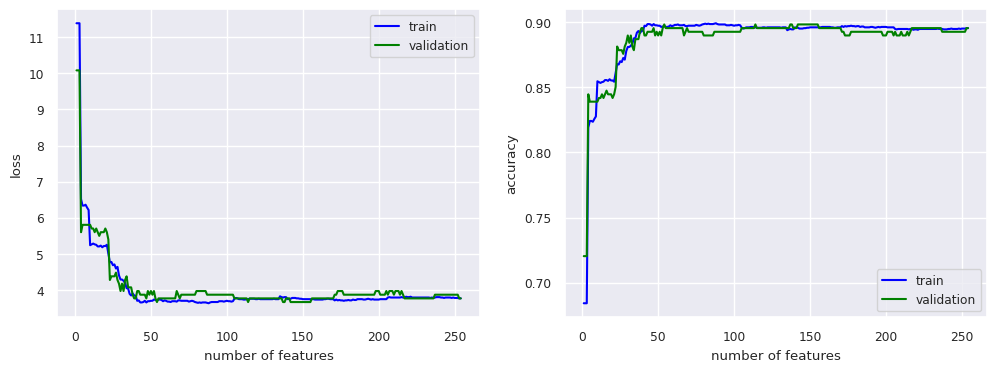

In [62]:
plt.figure(figsize=(12,4))
labels = range(1,len(best_features) + 1)

plt.subplot(1,2,1)
plt.plot(labels, train_loss, color = 'blue')
plt.plot(labels, val_loss, color = 'green')
plt.xlabel("number of features")
plt.ylabel("loss")
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt.plot(labels, train_accuracy, color = 'blue')
plt.plot(labels, val_accuracy, color = 'green')
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.legend(['train','validation'])

In [63]:
svm = SVC(C=100, degree=1, kernel='poly')
svm.fit(X_train[features], y_train)
yhat_test = svm.predict(X_test[features])

In [64]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       569
         1.0       0.87      0.70      0.78       316

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.84       885
weighted avg       0.86      0.86      0.85       885



In [65]:
#compare our testing results to the training data
yhat_train = svm.predict(X_train[features])

In [66]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2179
         1.0       0.92      0.73      0.82      1006

    accuracy                           0.90      3185
   macro avg       0.90      0.85      0.87      3185
weighted avg       0.90      0.90      0.89      3185



In [67]:
#validation data results
yhat_val = svm.predict(X_val[features])

In [68]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       255
         1.0       0.83      0.79      0.81        99

    accuracy                           0.90       354
   macro avg       0.87      0.86      0.87       354
weighted avg       0.89      0.90      0.89       354



### Training vs Testing Error

After evaluating our SVM, we can see that our model performed quite well for both our training and testing data. Our training data achieved an accuracy of 0.9, precisions of 0.89 and 0.92 for the dropout class and enrolled/graduate class respectively, and recalls of 0.97 and 0.73.

Looking at our testing data, our metrics are very similar compared to our training data. Our metrics (accuracy, precision, and recall) are lower by a small margin, which is expected - our testing data is unseen and our training data is what was used to fit the model.

With these training and testing results we can conclude that our SVM generalizes quite well to unseen data, with a resounding accuracy of 0.86 on our testing data!

### Fitting Graph

In our fitting graph, (both loss and accuracy), we can see that our model improves drastically when we increased the number of features used from 0 to 50 for both our training and validation data.

After 50 features, increasing the number of features doesn't seem to improve our model in any significant form, and our training and validation accuracy stops improving and flatlines, as well as our loss (stops decreasing).

Coupled with our classification reports for our training and testing data, our fitting graphs show that our SVM is neither underfitting nor overfitting. It performs very well on the training data but hasn't 'memorized' it, as we can see from our validation results, which follow the same trend of improvement.

Compared to our first model (logistic regression), our fitting graph is very similar and follows the same trend. Our logistic regression model improved in performance from incrementing the number of features from 0-50, and flatlined for any increase in the features after. Our logistic regression model also did not overfit as it performed similarly well across our training, validation, and testing data.

Compared to our second model (neural network), our SVM performs similarly as well, achieving the same accuracy on the testing data (0.87). The precision and recall metrics are a bit different, however. Our SVM has a higher precision for the enrolled/graduate class and higher recall for the dropout class, while our neural network seems to be more balanced on those metrics.

### Hyperparameter Tuning

We performed hyperparameter tuning with different C (regularization) parameters, different kernels, and different degrees by using sklearn's GridSearchCV. Out of all the parameters we performed hyperparameter tuning on, the combination of parameters that was optimal was C = 100 (the highest regularization parameter we checked), kernel='poly' (polynomial), and degree=1.

This combination of parameters being the optimal one for our SVM means that a more simple model was favored compared to a complex one. The highest regularization parameter (C) being chosen means that complexity was punished for this model. Our best kernel was also a polynomial kernel with degree 1, the lowest degree we tested. This means that our data was able to be separated by label quite easily and that our best model was quite simple. Since our model punished complexity, overfitting to the training data was prevented. This can be seen in our fitting graph, where the metrics for our validation data followed the same trend of improvement as our training data.

#### Label, Data, and Loss Changes

* Label Changes:

We did not have to change our target labels, as they were already changed before from multi-class (dropout, enrolled, graduate) to binary (combined enrolled and graduate). Our SVM predicts the same outcomes that our logistic regression model and neural network did, so no label changes were made.

* Data Changes:

Similar to the previous model, the number of features used changed as we were comparing them in the fitting graph in terms of loss and accuracy. The best number of features is then kept for the final model.

* Loss Changes:

Like our logistic regression model, we stuck with logistic loss as our loss function. We opted to keep the loss function as logistic loss because our SVM has the same goal as our logistic regression model, which is to predict the binary outcome of dropout or enrolled/graduated. Both our logistic regression model and our SVM performed well with this loss function, so there was no need to change it after seeing the results for both.